Python Crash Course
===================

*Fraida Fund*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffund/ml-notebooks/blob/master/notebooks/1-python-numpy-tutorial.ipynb)

**Attribution**:

-   Parts of this notebook are adapted from a [tutorial from CS231N at Stanford University](https://cs231n.github.io/python-numpy-tutorial/), which is shared under the [MIT license]((https://opensource.org/licenses/MIT)).
-   Parts of this notebook are adapted from Jake VanderPlas’s [Whirlwind Tour of Python](https://colab.research.google.com/github/jakevdp/WhirlwindTourOfPython/blob/master/Index.ipynb), which is shared under the [Creative Commons CC0 Public Domain Dedication license](https://github.com/jakevdp/WhirlwindTourOfPython/blob/master/LICENSE).
-   The visualizations in this notebook are from [A Visual Intro to NumPy](http://jalammar.github.io/visual-numpy/) by Jay Alammar, which is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
-   Parts of this notebook (and some images) about `numpy` broadcasting are adapted from Sebastian Raschka’s [STATS451](https://github.com/rasbt/stat451-machine-learning-fs20) materials.

Introduction
------------

Python is a great general-purpose programming language on its own, but with the help of a few popular *libraries* (`numpy`, `pandas`, `matplotlib`) it becomes a powerful environment for scientific computing.

This tutorial is an introduction to Python and the `numpy` library for those who are already familiar with programming in another language.

In this tutorial, we will cover:

-   Basic Python: Basic data types, Containers (Lists, Dictionaries,, Tuples), Control Flow Statements, Errors and Exceptions, Functions, Classes
-   `numpy`: Arrays, Array indexing, Datatypes, Array math, Broadcasting
-   `matplotlib`: Basic Visualization, Subplots, Image Visualization

This tutorial is designed to run as a Python notebook on Colab. We’ll take a closer look at Colab and its features in a separate tutorial, but for now, here is what you need to know:

-   When you see a “cell” with Python code in it, move your mouse over the margin on the left side of the cell. A \> button will appear - click on that button to execute the code in the cell.
-   The output of the code will appear underneath the cell.
-   You can edit the code in the cell and press the \> button again to execute the modified code.

As you work through this tutorial, look at the code in each cell, and try to predict its output before you run it! Then, run the cell and check your understanding. You can also try to modify the code and observe the effect of your changes.

A Brief Note on Python Versions
-------------------------------

As of Janurary 1, 2020, Python has [officially dropped support](https://www.python.org/doc/sunset-python-2/) for `python2`. We’ll be using Python 3 for this course.

Basics of Python
----------------

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [2]:
x = 3
print(x, type(x))

3 <class 'int'>


By the way: note that you did not have to declare the variable `x` or specify its type before you assigned a value to it. In Python, you can create a variable just by assigning something to it.

In [3]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation

4
2
6
9


Notice that in the cell above, there is a comment at the end of each line. Comments in Python are indicated by a pound sign (`#`), and anything on the line following the pound sign is ignored. You can have inline comments that follow a statement on the same line, like the ones above, or a comment on its own line.

In [4]:
x += 1
print(x)
x *= 2
print(x)

4
8


In [5]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [6]:
t, f = True, False
print(type(t))

<class 'bool'>


Now let's look at the operations:

In [7]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [8]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello))

hello 5


In [9]:
hw = hello + ' ' + world  # String concatenation
print(hw)

hello world


In [10]:
hw12 = '{} {} {}'.format(hello, world, 12)  # string formatting
print(hw12)

hello world 12


String objects have a bunch of useful methods; for example:

In [11]:
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [12]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [13]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [14]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

[3, 1, 'foo', 'bar']


In [15]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [16]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [17]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [18]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [19]:
# note: this cell will raise an error
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [21]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [ ]:
del d['fish']        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [22]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       

print(d[(1, 2)])

<class 'tuple'>
5
1


In [23]:
d[0] = 100 # you can change a value in the dictionary...
print(d)

{(0, 1): 0, (1, 2): 1, (2, 3): 2, (3, 4): 3, (4, 5): 4, (5, 6): 5, (6, 7): 6, (7, 8): 7, (8, 9): 8, (9, 10): 9, 0: 100}


In [24]:
t[0] = 1 # ...but not a value in the tuple
# this cell raises an error! 'tuple' object does not support item assignment

TypeError: 'tuple' object does not support item assignment

### Control Flow Statements

#### If-Else

Conditional statements, often referred to as *if-then* statements, allow the programmer to execute certain pieces of code depending on some Boolean condition.

A basic example of a Python conditional statement is this:

In [25]:

x = -15

if x == 0:
    print(x, "is zero")
elif x > 0:
    print(x, "is positive")
elif x < 0:
    print(x, "is negative")
else:
    print(x, "is unlike anything I've ever seen...")

-15 is negative


Note especially the use of colons (`:`) and whitespace to denote separate blocks of code.

A *block* of code is a set of statements that should be treated as a unit. In C, for example, code blocks are denoted by curly braces:

``` c
// C code
for(int i=0; i<100; i++)
   {
      // curly braces indicate code block
      total += i;
   }
```

In Python, code blocks are denoted by *indentation*:

``` python
for i in range(100):
    # indentation indicates code block
    total += i
```

where all statements that should be evaluated within the “block” are at the same level of indentation.

Indented code blocks are always preceded by a colon (`:`) on the previous line.

#### For

Loops in Python are a way to repeatedly execute some code statement. So, for example, if we’d like to print each of the items in a list, we can use a `for` loop:

In [26]:
for N in [2, 3, 5, 7]:
    print(N, end=' ') # print all on same line

2 3 5 7 

Notice the simplicity of the `for` loop: we specify the variable we want to use, the sequence we want to loop over, and use the “`in`” operator to link them together in an intuitive and readable way. More precisely, the object to the right of the “`in`” can be any Python *iterator*.

For example, one of the most commonly-used iterators in Python is the `range` object, which generates a sequence of numbers:

In [27]:
for i in range(10):
    print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 

Note that the range starts at zero by default, and that by convention the top of the range is not included in the output.

We can loop over any list, no matter what type of object is stored in it.

In [28]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [29]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: monkey


It is easy to iterate over the keys in a dictionary:

In [30]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


#### While

The other type of loop in Python is a `while` loop, which iterates until some condition is met:

In [31]:
i = 0
while i < 10:
    print(i, end=' ')
    i += 1

0 1 2 3 4 5 6 7 8 9 

#### List comprehensions

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [32]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [33]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [34]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


Dictionary comprehensions are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [35]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


### Errors and Exceptions

When you are working with Python, you are likely to come across errors. When an error occurs, Python tries to explain to you what went wrong, but it takes some experience to interpret the error messages.

The code in the following cell will raise a `SyntaxError` because it tries to use a variable name that begins with a number, which is not allowed in Python.

Run the code, and look for three key “ingredients” in the error message that is printed to the output:

-   the type of error. In this case, it will be a `SyntaxError`. This type of error is raised by the *parser*, which checks to see if the code is valid before passing it to the *runtime* to execute the code.
-   an explanation of the error, if available. In this case, the explanation is “invalid syntax”.
-   details about where the error was detected. At what line of code, and what point in the line, did the error occur?

In [36]:
1st_number = 1

SyntaxError: invalid decimal literal (1203185488.py, line 1)

Here are some more examples. Run the following cells, one at a time. Each will trigger an error message. Try to parse the error message by looking for the three “ingredients”.

Look up each error type in [the documentation](https://docs.python.org/3/library/exceptions.html). Under what conditions is this error raised?

In [37]:
x=0 
x++

SyntaxError: invalid syntax (1621777844.py, line 2)

In [38]:
x=0

 x=x+1

IndentationError: unexpected indent (3907976136.py, line 3)

In [39]:
print('Hello'

SyntaxError: incomplete input (1103635973.py, line 1)

In [ ]:
1 + 'asdf'

In [40]:
import NoSuchLibrary

ModuleNotFoundError: No module named 'NoSuchLibrary'

In [ ]:
print(xyz)

In [41]:
x=0 
5/x

ZeroDivisionError: division by zero

### Functions

Python functions are defined using the `def` keyword. For example:

In [42]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [43]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


### Classes

The syntax for defining classes in Python is straightforward:

In [44]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


Numpy
-----

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package. By convention, we import it using the alias `np`. Then, when we want to use modules or functions in this library, we preface them with `np.`

In [45]:
import numpy as np

### Arrays and array construction

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can create a `numpy` array by passing a Python list to `np.array()`.

In [46]:
a = np.array([1, 2, 3])  # Create a rank 1 array
a

array([1, 2, 3])

This creates the array we can see on the right here:

![](http://jalammar.github.io/images/numpy/create-numpy-array-1.png)

In [47]:
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [48]:
a.size

3

To create a `numpy` array with more dimensions, we can pass nested lists, like this:

![](http://jalammar.github.io/images/numpy/numpy-array-create-2d.png)

![](http://jalammar.github.io/images/numpy/numpy-3d-array.png)

In [49]:
b = np.array([[1,2],[3,4]])   # Create a rank 2 array
print(b)

[[1 2]
 [3 4]]


In [50]:
print(b.shape)

(2, 2)


In [51]:
b.size

4

There are often cases when we want numpy to initialize the values of the array for us. numpy provides methods like `ones()`, `zeros()`, and `random.random()` for these cases. We just pass them the number of elements we want it to generate:

![](http://jalammar.github.io/images/numpy/create-numpy-array-ones-zeros-random.png)

We can also use these methods to produce multi-dimensional arrays, as long as we pass them a tuple describing the dimensions of the matrix we want to create:

![](http://jalammar.github.io/images/numpy/numpy-matrix-ones-zeros-random.png)

![](http://jalammar.github.io/images/numpy/numpy-3d-array-creation.png)

Sometimes, we need an array of a specific shape with “placeholder” values that we plan to fill in with the result of a computation. The `zeros` or `ones` functions are handy for this:

In [52]:
a = np.zeros((5,4))  # Create an array of all zeros
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [53]:
b = np.ones((6,4))   # Create an array of all ones
print(b)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [54]:
c = np.full((4,5), 10) # Create a constant array
print(c)

[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


In [ ]:
d = np.eye(5)        # Create a 2x2 identity matrix
print(d)

In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

Lastly, I want to mention two very useful functions for creating sequences of numbers within a specified range, namely, arange and linspace. NumPy’s arange function follows the same syntax as Python’s range objects: If two arguments are provided, the first argument represents the start value and the second value defines the stop value of a half-open interval:

Numpy also has two useful functions for creating sequences of numbers: `arange` and `linspace`.

The `arange` function accepts three arguments, which define the start value, stop value of a half-open interval, and step size. (The default step size, if not explicitly specified, is 1; the default start value, if not explicitly specified, is 0.)

The `linspace` function is similar, but we can specify the number of values instead of the step size, and it will create a sequence of evenly spaced values.

In [ ]:
f = np.arange(10,50,5)   # Create an array of values starting at 10 in increments of 5
print(f)

In [ ]:
g = np.linspace(10., 50., num=6 )  # x2-x1/(n-1)
print(g)

Sometimes, we may want to construct an array from existing arrays by “stacking” the existing arrays, either vertically or horizontally. We can use `vstack()` (or `row_stack`) and `hstack()` (or `column_stack`), respectively.

In [55]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [56]:
a = np.array([[7], [8], [9]])
b = np.array([[4], [5], [6]])
np.hstack((a,b))

array([[7, 4],
       [8, 5],
       [9, 6]])

In [57]:
a = np.ones((2,2))
b= np.zeros((2,3))
np.hstack((a,b))

array([[1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

In [58]:
str1 ="eye"
str1[::-1]
if str1 == str1[::-1]:
    print("true")

true


### Array indexing

Numpy offers several ways to index into arrays.

We can index and slice numpy arrays in all the ways we can slice Python lists:

![](http://jalammar.github.io/images/numpy/numpy-array-slice.png)

And you can index and slice numpy arrays in multiple dimensions. If slicing an array with more than one dimension, you should specify a slice for each dimension:

![](http://jalammar.github.io/images/numpy/numpy-matrix-indexing.png)

In [59]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])


b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [60]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [61]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array. Mixing integer indexing with slices yields an array of lower rank, while using only slices yields an array of the same rank as the original array:

In [62]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [63]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [65]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

In [73]:
# Create an array of indices
b = np.array([0, 2, 0, 1])
   #0,0   1,2 ,  2, 0 ,  3, 1
# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

When working with numpy arrays, it’s often helpful to get the *indices* (not only the values) of array elements that meet certain conditions. There are a few numpy functions that you’ll definitely want to remember:

-   [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) (get index of maximum element in array)
-   [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) (get index of minimum element in array)
-   [`argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) (get sorted list of indices, by element value, in ascending order)
-   [`where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) (get indices of elements that meet some condition)

In [76]:
import numpy as np
a = np.array([1, 8, 9, -3, 2, 4, 7, 9])
print(a)
# Get the index of the maximum element in a
print(np.argmax(a))

# Get the index of the minimum element in a
# (this array has two elements with the maximum value - 
# only one index is returned)
print(np.argmin(a))

# Get sorted list of indices
print(np.argsort(a))

# Get sorted list of indices in descending order
# [::-1] is a special slicing index that returns the reversed list
print(np.argsort(a)[::-1])

# Get indices of elements that meet some condition
# this returns a tuple, the list of indices is the first entry
# so we use [0] to get it
print(np.where(a > 5)[0])

# Get indices of elements that meet some condition
# this example shows how to get the index of *all* the max values
print(np.where(a >= a[np.argmax(a)])[0])

[ 1  8  9 -3  2  4  7  9]
2
3
[3 0 4 5 6 1 2 7]
[7 2 1 6 5 4 0 3]
[1 2 6 7]
[2 7]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [66]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int32 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

What makes working with `numpy` so powerful and convenient is that it comes with many *vectorized* math functions for computation over elements of an array. These functions are highly optimized and are *very* fast - much, much faster than using an explicit `for` loop.

For example, let’s create a large array of random values and then sum it both ways. We’ll use a `%%time` *cell magic* to time them.

In [69]:
a = np.random.random(100000000)

In [70]:
%%time
x = np.sum(a)

CPU times: total: 859 ms
Wall time: 2.02 s


In [71]:
%%time
x = 0 
for element in a:
  x = x + element

CPU times: total: 24.8 s
Wall time: 46.2 s


Look at the “Wall Time” in the output - note how much faster the vectorized version of the operation is! This type of fast computation is a major enabler of machine learning, which requires a *lot* of computation.

Whenever possible, we will try to use these vectorized operations.

Some mathematic functions are available both as operator overloads and as functions in the numpy module.

For example, you can perform an elementwise sum on two arrays using either the + operator or the `add()` function.

![](http://jalammar.github.io/images/numpy/numpy-arrays-adding-1.png)

![](http://jalammar.github.io/images/numpy/numpy-matrix-arithmetic.png)

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

And this works for other operations as well, not only addition:

![](http://jalammar.github.io/images/numpy/numpy-array-subtract-multiply-divide.png)

In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot()` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot()` is available both as a function in the numpy module and as an instance method of array objects:

![](http://jalammar.github.io/images/numpy/numpy-matrix-dot-product-1.png)

In [78]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([0,1])
w = np.array([1, 0])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

0
0


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(v @ w)

In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

Besides for the functions that overload operators, Numpy also provides many useful functions for performing computations on arrays, such as `min()`, `max()`, `sum()`, and others:

![](http://jalammar.github.io/images/numpy/numpy-matrix-aggregation-1.png)

In [64]:
x = np.array([[1, 2], [3, 4], [5, 6]])

print(np.max(x))  # Compute sum of all elements; prints "21"
print(np.min(x))  # Compute sum of all elements; prints "21"
print(np.sum(x))  # Compute sum of all elements; prints "21"

6
1
21


Not only can we aggregate all the values in a matrix using these functions, but we can also aggregate across the rows or columns by using the `axis` parameter:

![](http://jalammar.github.io/images/numpy/numpy-matrix-aggregation-4.png)

In [ ]:
x = np.array([[1, 2], [5, 3], [4, 6]])

print(np.max(x, axis=0))  # Compute max of each column; prints "[5 6]"
print(np.max(x, axis=1))  # Compute max of each row; prints "[2 5 6]"

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object.

![](http://jalammar.github.io/images/numpy/numpy-transpose.png)

In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])

print(x)
print("transpose\n", x.T)

In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

In more advanced use case, you may find yourself needing to change the dimensions of a certain matrix. This is often the case in machine learning applications where a certain model expects a certain shape for the inputs that is different from your dataset. numpy's `reshape()` method is useful in these cases.

![](http://jalammar.github.io/images/numpy/numpy-reshape.png)

A common task in this class will be to convert a 1D array to a 2D array, and vice versa. We can use `reshape()` for this.

For example, suppose we had this 2D array, but we need to pass it to a function that expects a 1D array.

In [ ]:
w = np.array([[1],[2],[3]])
print(w)
w.shape

We can remove the “unnecessary” extra dimension with

In [ ]:
y = w.reshape(-1,)
print(y)
y.shape

Note that we can pass -1 as one dimension and numpy will infer the correct size based on our matrix size!

There’s also a `squeeze()` function that removes *all* of the “unnecessary” dimensions (dimensions that have size 1) from an array:

In [ ]:
z = w.squeeze()
print(z)
z.shape

To go from a 1D to 2D array, we can just add in another dimension of size 1:

In [ ]:
y.reshape((-1,1))

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations.

For example: basic linear algebra, we can only add (and perform similar element-wise operations) two matrics that have the *same* dimension. In numpy, if we want to add two matrics that have different dimensions, numpy will implicitly “extend” the dimension of one matrix to match the other so that we can perform the operation.

So these operations will work, instead of returning an error:

![](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-1.png)

![](https://sebastianraschka.com/images/blog/2020/numpy-intro/broadcasting-2.png)

Broadcasting two arrays together follows these rules:

**Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

For example, in the following cell, `a` will be implicitly extended to shape (1,3):

In [80]:
a = np.array([1,2,3])         # has shape (3,): one dimension
b = np.array([[4], [5], [6]]) # has shape (3,1): two dimensions
c = a + b  
c# will have shape (3,3) (two dimensions)

array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

**Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

For example, in the following cell `a` will be implicitly extended to shape (3,2):

In [81]:
a = np.array([[1],[2],[3]])         # has shape (3,1)
b = np.array([[4,5], [6,7], [8,9]]) # has shape (3,2)
c = a + b              
c # will have shape (3,2) 

array([[ 5,  6],
       [ 8,  9],
       [11, 12]])

**Rule 3**: If in any dimension the sizes disagree and neither is equal to 1, an error is raised:

In [ ]:
a = np.array([[1],[2],[3],[4]])      # has shape (4,1)
b = np.array([[4,5], [6,7], [8,9]])  # has shape (3,2)
c = a + b                            # ValueError: operands could not be broadcast

For more detail, you can read the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are a few visual examples involving broadcasting.

![](http://jalammar.github.io/images/numpy/numpy-array-broadcast.png)

Note that these arrays are compatible in each dimension if they have either the same size in that dimension, or if one array has size 1 in that dimension.

![](http://jalammar.github.io/images/numpy/numpy-matrix-broadcast.png)

And here are some more practical applications:

In [82]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

Matplotlib
----------

Matplotlib is a plotting library. In this section we give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

By convention, we typically import this module using the `plt` alias:

In [83]:
import matplotlib.pyplot as plt

### Plotting

The most important function in `matplotlib` is `plot`, which allows you to plot 2D data as a line plot. Here is a simple example:

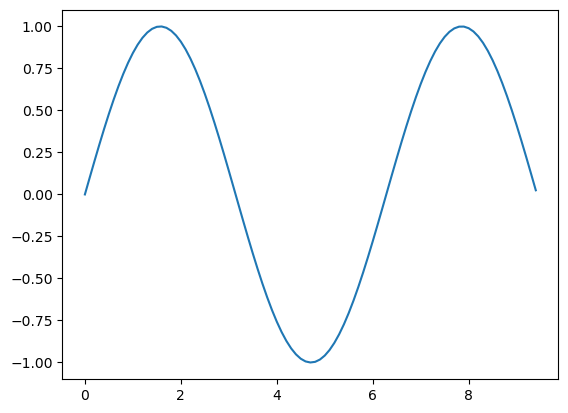

In [84]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

# Show the figure.
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin, label='Sine')
plt.plot(x, y_cos, label='Cosine')
plt.legend() # uses the label arguments given above

plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')

# Show the figure.
plt.show()

Another useful, basic, plot is the `scatter` plot:

In [ ]:
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.randint(0, 2, 50)

plt.scatter(x, y, c=colors)

plt.show()

When there is no logical connection between adjacent points (for example: if the horizontal axis is a categorical variable without a logical order), then you should *not* connect them (as in a line plot), since this implies a relationship that does not exist! Instead, you would use a scatter plot.

### Subplots

You can plot different things in the same figure using the `subplot` function. Here is an example:

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Adjust spacing between subplots
plt.subplots_adjust(hspace = 0.4)

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

You can use the `imshow` function to display images from a file. Here is an example:

In [ ]:
from matplotlib.cbook import get_sample_data

img_file = get_sample_data('grace_hopper.jpg')

img = plt.imread(img_file)
plt.imshow(img)
plt.show()

The `matplotlib` library is very flexible, and you can create virtually any plot and modify its appearance in any way you might think of. If you don’t like the way your plot looks, fix it! Use the [documentation](http://matplotlib.org/api/pyplot_api.html) to learn more.